In [47]:
pip install tensorflow-gpu

In [48]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("D:/Project/final/trainn/0/WIN_20220128_16_01_14_Pro.jpg")

In [3]:
img_array.shape # rgb image becoz this has 3 chnnels

(720, 1280, 3)

In [4]:
print(img_array)

[[[172 181 195]
  [169 178 192]
  [169 177 190]
  ...
  [190 190 202]
  [194 194 206]
  [197 197 209]]

 [[172 179 194]
  [170 178 191]
  [174 180 193]
  ...
  [193 193 205]
  [194 194 206]
  [193 193 205]]

 [[183 189 202]
  [181 187 200]
  [183 186 200]
  ...
  [196 196 210]
  [193 194 208]
  [189 190 204]]

 ...

 [[122 115 118]
  [128 122 123]
  [127 122 124]
  ...
  [ 47  42  43]
  [ 45  40  41]
  [ 42  37  38]]

 [[125 119 120]
  [126 121 120]
  [126 121 122]
  ...
  [ 49  44  45]
  [ 50  46  45]
  [ 48  44  43]]

 [[126 121 120]
  [123 118 117]
  [128 124 123]
  ...
  [ 51  46  47]
  [ 55  51  50]
  [ 55  51  50]]]


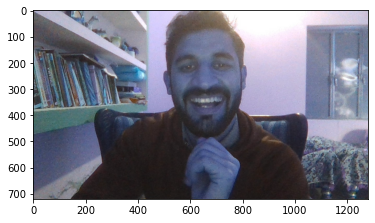

In [5]:
plt.imshow(img_array) #BGR

In [6]:
DataDirectory = "D:/Project/final/train/" #Training DataSet

In [7]:
classes = ['0','1'] #List of classes ==> this must b exact name of your folders under training folder

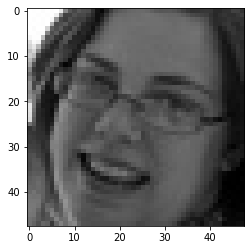

In [8]:
for category in classes:
    path = os.path.join(DataDirectory, category) #//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path , img))
        #backtorgb = (cv2.cvtColor(img_array, cv2.COlOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array , cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
       
                   
        
        

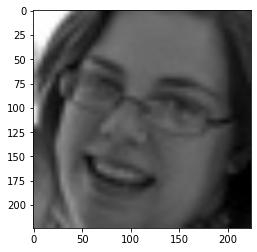

In [9]:
img_size = 224 #==>224 * 224
new_array = cv2.resize(img_array , (img_size , img_size))
plt.imshow(cv2.cvtColor(new_array , cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_data = [] #data array

def create_training_data():
    for category in classes:
        path = os.path.join(DataDirectory , category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path , img))
                new_array = cv2.resize(img_array , (img_size , img_size))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass

In [12]:
create_training_data()

In [13]:
print(len(training_data))

2000


In [14]:
import random
random.shuffle(training_data)
    

In [15]:
x = [] #data / feature
y = [] #label

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3) #converting it into 4 dimensions

In [16]:
x.shape

(2000, 224, 224, 3)

In [17]:
#Normalize the data
x = x/255.0; #we are normlizing it

In [18]:
type(y)

list

In [19]:
y[0]   ## 000000000 000000010 00000100  ONE HOT ENCODING

0

In [20]:
y = np.array(y)

In [21]:
y.shape

(2000,)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [23]:
model = tf.keras.applications.MobileNetV2()

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output = layers.Dense(128)(base_output)##adding new layer after the output of global pooling layer
final_output = layers.Activation('relu')(final_output)##Activation Function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(2 , activation = 'softmax')(final_output)## my classes are 7, classification layer

In [29]:
final_output ##output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>

In [30]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [31]:
 new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [32]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
y[1900]

0

In [34]:
new_model.fit(x,y, epochs = 5)

Epoch 1/5
63/63 [==============================] - 434s 7s/step - loss: 0.4410 - accuracy: 0.8030
Epoch 2/5
63/63 [==============================] - 376s 6s/step - loss: 0.2716 - accuracy: 0.8995
Epoch 3/5
63/63 [==============================] - 343s 5s/step - loss: 0.2308 - accuracy: 0.9105
Epoch 4/5
63/63 [==============================] - 341s 5s/step - loss: 0.2044 - accuracy: 0.9225
Epoch 5/5
63/63 [==============================] - 345s 5s/step - loss: 0.1444 - accuracy: 0.9445


In [35]:
new_model.save('Fiinaal_model')

INFO:tensorflow:Assets written to: Fiinaal_model\assets


D:\Anaconda\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\Anaconda\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [36]:
frame = cv2.imread("R.jfif")

In [37]:
frame.shape

(240, 320, 3)

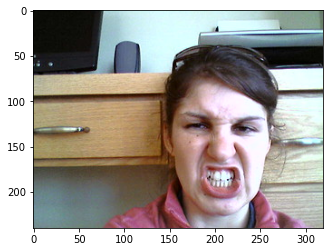

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(240, 320)

In [42]:
 faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = frame[y:y+h , x:x+w]
    cv2.rectangle(frame, (x , y) , (x + w , y + h) , (255 , 0 , 0) , 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex , ey , ew , eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]
               

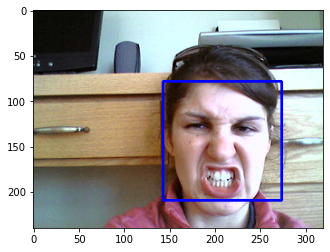

In [43]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

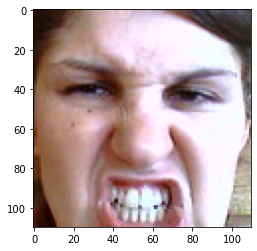

In [44]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [45]:
final_image = cv2.resize(face_roi , (224 , 224)) ##
final_image = np.expand_dims(final_image , axis=0) ##need fourth dimension
final_image = final_image/255.0##normalizing

In [46]:
predictions = new_model.predict(final_image)

In [47]:
predictions[0]

array([9.999999e-01, 8.029849e-08], dtype=float32)

In [48]:
np.argmax(predictions)

0

In [49]:
frame = cv2.imread("N.jfif")

In [50]:
frame.shape

(632, 474, 3)

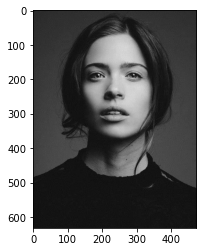

In [51]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [52]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [53]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [54]:
gray.shape

(632, 474)

In [55]:
 faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = frame[y:y+h , x:x+w]
    cv2.rectangle(frame, (x , y) , (x + w , y + h) , (0 , 255 , 0) , 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex , ey , ew , eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]
               

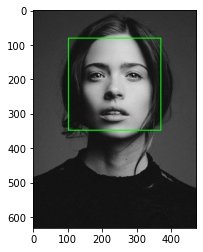

In [56]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

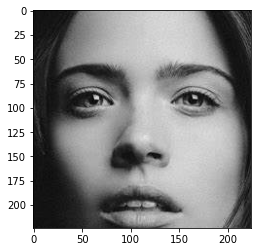

In [57]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [58]:
final_image = cv2.resize(face_roi , (224 , 224)) ##
final_image = np.expand_dims(final_image , axis=0) ##need fourth dimension
final_image = final_image/255.0##normalizing

In [59]:
predictions = new_model.predict(final_image)

In [60]:
predictions[0]

array([0.00142596, 0.998574  ], dtype=float32)

In [61]:
np.argmax(predictions)

1

In [62]:
final_image = cv2.resize(face_roi , (224 , 224)) ##
final_image = np.expand_dims(final_image , axis=0) ##need fourth dimension
final_image = final_image/255.0##normalizing

In [63]:
predictions = new_model.predict(final_image)

In [64]:
predictions[0]

array([0.00142596, 0.998574  ], dtype=float32)

In [65]:
np.argmax(predictions)

1

In [66]:
import cv2 #pip install opencv-python


In [67]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [68]:
import deepface

In [69]:
path = "haarcascade_frontalface_default.xml"

In [70]:
font_scale = 1.5

In [71]:
font = cv2.FONT_HERSHEY_PLAIN

In [72]:
rectangle_bgr = (255 , 255 , 255)

In [73]:
img = np.zeros((500 , 500))

In [74]:
text = "Some text in a box"

In [75]:
(text_width , text_height) = cv2.getTextSize(text , font , fontScale = font_scale , thickness = 1)[0]

In [76]:
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the cords of the box  with a small padding of two pixel
box_coords = ((text_offset_x , text_offset_y) , (text_offset_x + text_width + 2 , text_offset_y - text_height - 2))
cv2.rectangle(img , box_coords[0] , box_coords[1] , rectangle_bgr , cv2.FILLED)
cv2.putText(img , text , (text_offset_x , text_offset_y) , font , fontScale = font_scale , color = (0 , 0 , 0) , thickness = 1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
cap = cv2.VideoCapture(1)
# checked if the web cam is opened corectly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can not open webcam")
    
while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray , 1.1 , 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] # croping the face
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image, axis=0)# need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predictions)==0):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        ##Draw black background rectangle
        cv2.rectangle(frame, (x1,x1) , (x1 + w1 , y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w , y+h), (0,0,255))
        
    elif(np.argmax(predictions)==1):
        status = "neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        ##Draw black background rectangle
        cv2.rectangle(frame, (x1,x1) , (x1 + w1 , y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w , y+h), (0,0,255))
        
    
        
    else:
        status = "angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        ##Draw black background rectangle
        cv2.rectangle(frame, (x1,x1) , (x1 + w1 , y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w , y+h), (0,0,255))
    
        
        
    
    
        
        
    cv2.imshow('Face Emotion Recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        

Face not Detected
Face not Detected


In [ ]:
elif(np.argmax(predictions)==2):
        status = "angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        ##Draw black background rectangle
        cv2.rectangle(frame, (x1,x1) , (x1 + w1 , y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w , y+h), (0,0,255))elif(np.argmax(predictions)==2):
        status = "angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        ##Draw black background rectangle
        cv2.rectangle(frame, (x1,x1) , (x1 + w1 , y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w , y+h), (0,0,255))